In [1]:
import numpy as np 
import pandas as pd 
from sklearn.preprocessing import normalize, StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import silhouette_score
from sklearn.metrics import calinski_harabasz_score
from sklearn.metrics import davies_bouldin_score
from numpy.random import uniform
import random
from KMEANS import kmeans
from Visualization import visualization, interactive_visualization

In [2]:
df = pd.read_csv('breast-cancer-clustering.csv')

In [3]:
#Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

#Normalizing the data so that the data approximately follows a Gaussian distribution
df_normalized = normalize(df_scaled)

In [4]:
#Converting the numpy array into a pandas DataFrame
df_normalized = pd.DataFrame(df_normalized)
#Renaming the columns
df_normalized.columns = df.columns
pd.reset_option('display.max_rows')
df_normalized

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,0.102429,-0.193580,0.118569,0.091908,0.146442,0.306571,0.247690,0.236449,0.207042,0.210612,...,0.176154,-0.126913,0.215080,0.186849,0.122094,0.244309,0.196959,0.214377,0.256816,0.180853
1,0.356555,-0.068908,0.328522,0.371927,-0.161140,-0.094910,-0.004647,0.106810,0.000271,-0.169264,...,0.351899,-0.071942,0.299132,0.368377,-0.073191,-0.083876,-0.028595,0.211827,-0.047524,0.054792
2,0.258207,0.074556,0.256019,0.254774,0.153989,0.172083,0.222838,0.332952,0.153576,-0.065048,...,0.247090,-0.003918,0.220223,0.238006,0.086196,0.176987,0.139731,0.319513,0.188317,0.032914
3,-0.054977,0.018142,-0.042377,-0.054659,0.234774,0.243308,0.136986,0.103797,0.205017,0.351130,...,-0.020125,0.009580,-0.017871,-0.039326,0.242690,0.278377,0.142255,0.155568,0.432291,0.352853
4,0.298304,-0.196304,0.302782,0.311245,0.047784,0.091920,0.233662,0.243458,-0.001629,-0.095859,...,0.221317,-0.249982,0.228128,0.208048,0.037589,-0.053412,0.104504,0.124288,-0.147994,-0.067678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,0.252549,0.086313,0.246542,0.280407,0.124641,0.026207,0.232963,0.277668,-0.037397,-0.111383,...,0.227448,0.014081,0.209668,0.241100,0.045266,-0.032698,0.079499,0.194903,-0.162722,-0.084832
565,0.268387,0.328252,0.254388,0.271376,0.016129,-0.002807,0.109102,0.198933,-0.034266,-0.166652,...,0.241918,0.322312,0.223849,0.235344,-0.108817,-0.062155,0.037243,0.115523,-0.083727,-0.153329
566,0.181533,0.528758,0.173879,0.149394,-0.217256,-0.009998,0.012042,0.027342,-0.209148,-0.231499,...,0.145106,0.355384,0.149665,0.110609,-0.209269,0.090661,0.084466,0.107032,-0.285514,-0.082305
567,0.165814,0.210743,0.178819,0.156513,0.137621,0.295140,0.297377,0.239824,0.192770,0.094139,...,0.176899,0.201856,0.207779,0.149112,0.129021,0.352208,0.288417,0.206551,0.173097,0.200206


In [1]:
import os

folder_path = "/mnt/private/Clustering-Algorithms/csvs"  
k_values = [2, 3, 4, 5]  

csv_files = sorted([f for f in os.listdir(folder_path) if f.endswith('.csv')])
csv_files

['breast-cancer-clustering.csv',
 'glass-clustering.csv',
 'haberman-clustering.csv',
 'iris-clustering.csv',
 'wine-clustering.csv']

In [5]:
k = 2
data = df_normalized.values
clusters, centroids = kmeans(data, k)

In [6]:
# Calculate metrics
ch_index = calinski_harabasz_score(df_normalized, clusters)
silhouette_avg = silhouette_score(df_normalized, clusters)
db_index = davies_bouldin_score(df_normalized, clusters)

print("Silhouette Score:", silhouette_avg)
print("Calinski Harabasz Score:", ch_index)
print("Davies Bouldin Index:", db_index)

Silhouette Score: 0.3112573542135836
Calinski Harabasz Score: 281.12757678612513
Davies Bouldin Index: 1.3507289485150058


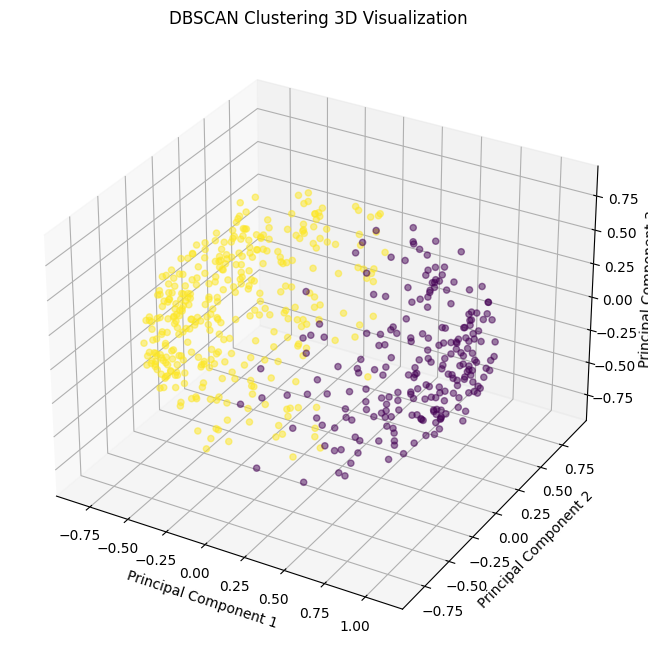

In [7]:
visualization(df_normalized, clusters)

In [8]:
interactive_visualization(df_normalized, clusters)

In [9]:
print(clusters.tolist().count(1))

348
